Gamma = 0.8

Model:
```python
    inp = Input((inp_width,))
    dense1 = Dense(25, activation="tanh", name="dense1")(inp)
    dense2 = Dense(50, activation="softplus", name="dense2")(dense1)
    dense3 = Dense(20, activation="softplus", name="dense3")(dense2)
    out = Dense(out_width, activation="linear", name="out_linear")(dense3)
    model = Model(inp, out)
```
2692 parameters

50 episodes/test run


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np


[0.33108718 0.925082   0.4656459  0.46484477 0.38616413 0.6764358
 0.1271548  0.69644155 0.82460277 0.77555721 0.9129837  0.6823169
 0.35797619 0.92865545 0.07938773 0.3534391  0.92308525 0.63007274
 0.4023346  0.35451542 0.73398102 0.06119256 0.17444581 0.7689688
 0.45440371 0.1704909  0.24366698 0.33482439 0.74739948 0.70209488]


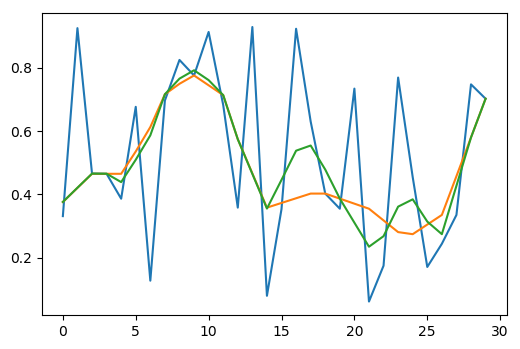

In [144]:
def smooth3s(x):
    if len(x) <= 2:
        return x
    y = np.empty_like(x)
    y[0], y[-1] = x[0], x[-1]
    for j in xrange(1,len(x)-1):
        y[j] = np.median(x[j-1:j+2])
    z = np.empty_like(y)
    z[0], z[-1] = (2*y[0]+y[1])/3, (2*y[-1]+y[-2])/3
    z[1:-1] = (y[1:-1] + y[:-2] + y[2:])/3
    return z

def smooth353(x):
    if len(x) <= 2:
        return x

    y3 = np.empty_like(x)
    y3[0], y3[-1] = x[0], x[-1]
    for j in xrange(1,len(x)-1):
        y3[j] = np.median(x[j-1:j+2])
        
    if len(y3) >= 5:
        y5 = np.empty_like(y3)
        y5[:2] = y3[:2]
        y5[-2:] = y3[-2:]
        for j in xrange(2,len(y3)-2):
            y5[j] = np.median(y3[j-2:j+3])
        y3[0], y3[-1] = y5[0], y5[-1]
        for j in xrange(1,len(x)-1):
            y3[j] = np.median(y5[j-1:j+2])

    return y3

def smooth353s(x):
    if len(x) < 3:
        return x
    
    x353 = smooth353(x)
    s = np.empty_like(x353)
    s[0], s[-1] = (2*x353[0]+x353[1])/3, (2*x353[-1]+x353[-2])/3
    s[1:-1] = (x353[1:-1] + x353[:-2] + x353[2:])/3
    
    return s
    

x= np.random.random((30,))
print x
plt.plot(x)
plt.plot(smooth353s(x))
plt.plot(smooth3s(x))

In [152]:
smooth(np.array([1.1,1.,-1.]))

array([ 1.06666667,  0.36666667, -0.33333333])

Differential

V-selective memory

7/21/2018

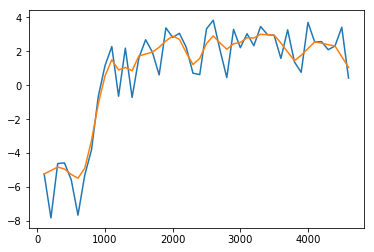

In [242]:
df=pd.read_csv("run_log.csv")
x=df["episodes"].values
y=df["reward_per_episode"].values
plt.plot(x,y)
plt.plot(x,smooth(y))

Differential

non-selective memory

7/21/2018

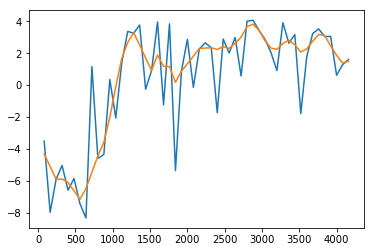

In [367]:
df=pd.read_csv("run_log.csv")
x=df["episodes"].values
y=df["reward_per_episode"].values
plt.plot(x,y)
plt.plot(x,smooth(y))

Dual QNet

soft_update=0.01

V-selective memory

7/21/2018 

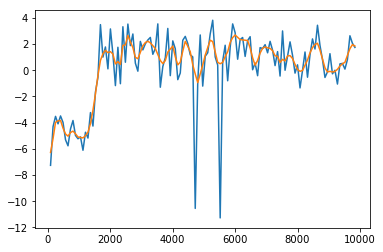

In [332]:
df=pd.read_csv("run_log.csv")
x=df["episodes"].values
y=df["reward_per_episode"].values
plt.plot(x,y)
plt.plot(x,smooth(y))

Dual QNet

soft_update=0.01

non-selective memory

7/21/2018


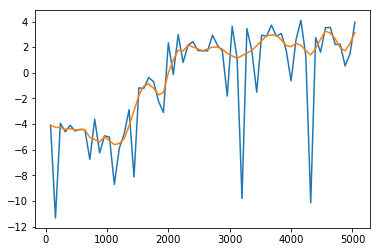

In [317]:
df=pd.read_csv("run_log.csv")
x=df["episodes"].values
y=df["reward_per_episode"].values
plt.plot(x,y)
plt.plot(x,smooth(y))

Dual QNet

soft_update=0.5

non-selective memory

7/21/2018


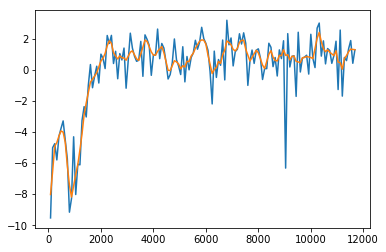

In [312]:
df=pd.read_csv("run_log.csv")
x=df["episodes"].values
y=df["reward_per_episode"].values
plt.plot(x,y)
plt.plot(x,smooth(y))

Dual QNet

soft_update=0.99

non-selective memory

7/21/2018


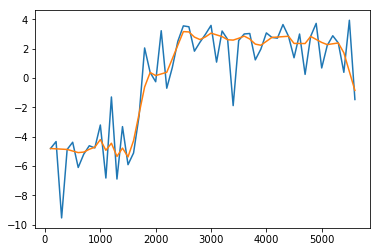

In [282]:
df=pd.read_csv("run_log.csv")
x=df["episodes"].values
y=df["reward_per_episode"].values
plt.plot(x,y)
plt.plot(x,smooth(y))

Dual QNet

soft_update=0.9999

non-selective memory

7/21/2018


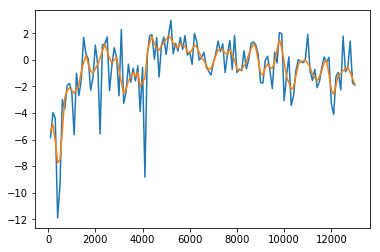

In [292]:
df=pd.read_csv("run_log.csv")
x=df["episodes"].values
y=df["reward_per_episode"].values
plt.plot(x,y)
plt.plot(x,smooth(y))

Gamma = 0.99

Differential
non-selective memory


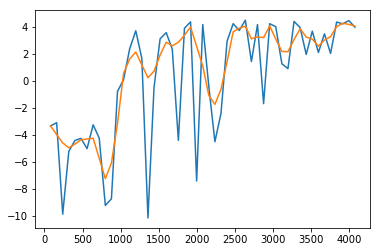

In [393]:
df=pd.read_csv("run_log.csv")
x=df["episodes"].values
y=df["reward_per_episode"].values
plt.plot(x,y)
plt.plot(x,smooth(y))

Differential
V-selective memory


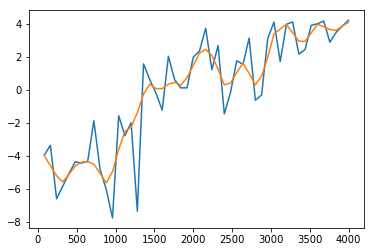

In [424]:
df=pd.read_csv("run_log.csv")
x=df["episodes"].values
y=df["reward_per_episode"].values
plt.plot(x,y)
plt.plot(x,smooth(y))

Evolution
memory transfer = 0.5, 1/6
gamma = 0.99
v-selection
3 agents with random independent start


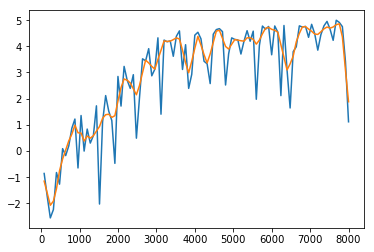

In [427]:

df=pd.read_csv("run_log.csv")
x=df["episodes"].values[:100]
y=df["reward_per_episode"].values[:100]
plt.plot(x,y)
plt.plot(x,smooth(y))

Evolution
memory transfer = 0.5, 1/6
gamma = 0.99
v-selection
3 agents with same start


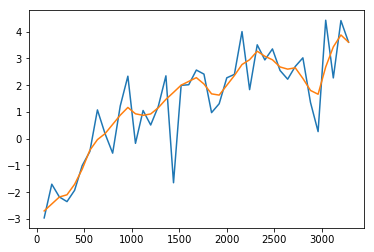

In [438]:
df=pd.read_csv("run_log.csv")
x=df["episodes"].values
y=df["reward_per_episode"].values
plt.plot(x,y)
plt.plot(x,smooth(y))

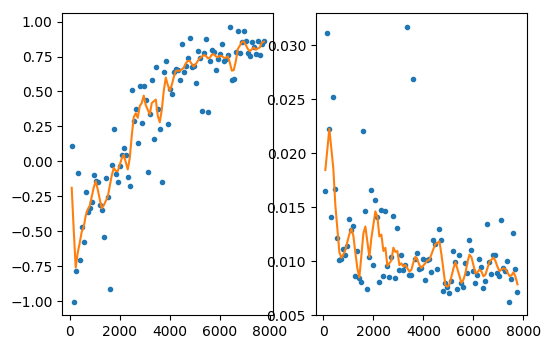

In [74]:
df=pd.read_csv("run_log.csv")
x=df["episodes"].values
y=df["reward_per_episode"].values
loss=df["loss_ma"].values

plt.subplot(121)
plt.plot(x,y, ls="None", marker=".")
plt.plot(x,smooth(y))

plt.subplot(122)
plt.plot(x, loss, ls="None", marker=".")
plt.plot(x, smooth(loss))

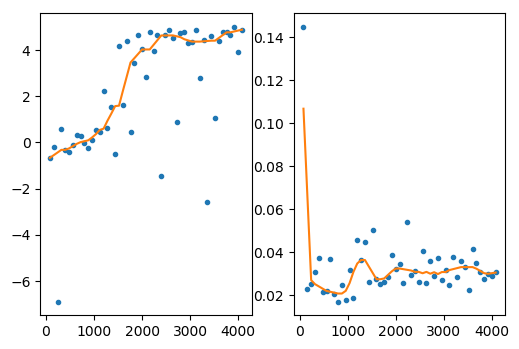

In [150]:
df=pd.read_csv("run_log.csv")
x=df["episodes"].values
y=df["reward_per_episode"].values
loss=df["loss_ma"].values

plt.subplot(121)
plt.plot(x,y, ls="None", marker=".")
plt.plot(x,smooth353s(y))

plt.subplot(122)
plt.plot(x, loss, ls="None", marker=".")
plt.plot(x, smooth353s(loss))